# Stretch Energy

In [1]:
from mol_dyn_md import MolDynMD

import numpy as np
import matplotlib.pyplot as plt
from math import pi

%matplotlib inline

# H2

## Setup

In [313]:
atom_types = [1, 1]
atom_xyz = np.array([[-0.5e-12, 0, 0], [0.5e-12, 0, 0]])
atom_velocities = np.array([[0., 0., 0.], [0., 0., 0.]])
atom_bonds = np.array([
    [[0, 0], [0.74e-12, -1.2]],
    [[0.74e-12, -1.2], [0, 0]]
])
atom_masses = np.array([8.17e-28, 8.17e-28])  # The reduced masses of hydrogen 1 (in H2) in kg

mol_dyn = MolDynMD(atom_types=atom_types,
                          atom_masses=atom_masses,
                          atom_velocities=atom_velocities,
                          atom_positions=atom_xyz,
                          atom_bonds=atom_bonds,
                          dt_s=1e-15,
                          grad_h_m=0.001e-15)

for _ in range(800):
    mol_dyn.timestep()

## Extract the x component of all positions and all velocities for plotting.

We should see two oscillatory motions. That never cross. Because we set our diatomic molecule along the x axis, we just need to plot x positions.

In [314]:
x_positions_1 = []
x_velocities_1 = []

x_positions_2 = []
x_velocities_2 = []

for step in mol_dyn.trajectory:
    positions = step["atom_positions"]
    velocities = step["atom_velocities"]
    x_positions_1.append(positions[0, 0])
    x_positions_2.append(positions[1, 0])
    x_velocities_1.append(velocities[0, 0])
    x_velocities_2.append(velocities[1, 0])
    
x_positions_1 = np.array(x_positions_1)
x_positions_2 = np.array(x_positions_2)
x_velocities_1 = np.array(x_velocities_1) 
x_velocities_2 = np.array(x_velocities_2)

Now make the plots

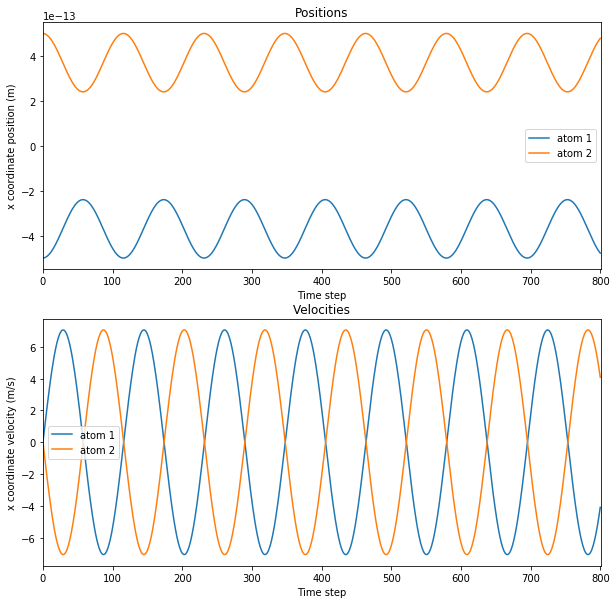

In [315]:
timesteps = np.arange(len(x_positions_1))

_, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axs[0].set_xlim(0, len(x_positions_1))
axs[0].set_title("Positions")
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("x coordinate position (m)")
axs[0].plot(timesteps, x_positions_1, label="atom 1")
axs[0].plot(timesteps, x_positions_2, label="atom 2")
axs[0].legend(loc="best")

axs[1].set_xlim(0, len(x_positions_2))
axs[1].set_title("Velocities")
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("x coordinate velocity (m/s)")
axs[1].plot(timesteps, x_velocities_1, label="atom 1")
axs[1].plot(timesteps, x_velocities_2, label="atom 2")
axs[1].legend(loc="best")

## What is the frequency?

Let's calculate based on the peaks of the waves, which in this case are all at the same level throughout the simulation.

First, multiply the whole array by 1e12, to zoom the scale onto meters. This gets rid of weird rounding errors.

Then we square the whole array to make it all positive.

Finally, we find all the indecies where the peaks are found. Look for rounding errors! Every index is an increment of 1 fs, so there are 500 fs in the length of the array. Count the peaks, but do not count the indecies that are 1 more than the previous index.

That gives 8 peaks in 500 fs.

In [316]:
x_positions_1_shift = x_positions_1 ** 2
np.where(x_positions_1_shift > x_positions_1_shift.max() * 0.999)

(array([  0, 115, 116, 231, 232, 347, 348, 463, 464, 578, 579, 580, 694,
        695, 696]),)

Convert the period to hertz, angular frequency to linear frequency and convert fs to s. This gets the frequency in Hz. 

In [319]:
period = 7 / len(x_positions_1_shift)         # 5 periods in x fs
omega = 2 * pi / period * 1e12                # angular frequency -- convert from fs
hz = omega / 2 / pi
thz = hz / 1e12
print(f"{thz} THz")

114.42857142857142 THz


Using [http://halas.rice.edu/conversions](http://halas.rice.edu/conversions) for unit conversions...

114 THz is approimately 3802 cm^{-1}

According to Atkins and DePaula Physical Chemistry 8th ed, The H-H bond is between wavenumber of 3200 and 3570. That is between 95 and 107 THz. k is 575 N/m (though that doesn't mean that that is what the MD parameters should be)

So our 

$$ k_{IJ} = -1.2 $$ 

$$ l_{IJ} = 74 pm $$ 

and 

$$ m=8.17 x 10^{-28} kg $$ 

(reduced mass) gives results close to this range within 7%

In [321]:
(3802 - 3570) / 3570 * 100 # error in percent

6.498599439775911

# CO

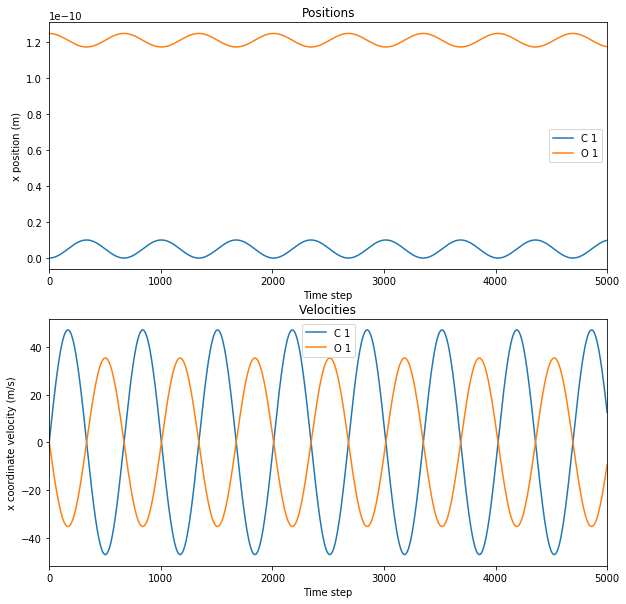

In [96]:
atom_types = [6, 8]
atom_xyz = np.array([[0., 0., 0.], [125e-12, 0., 0.]])
atom_velocities = np.array([[0., 0., 0.], [0, 0., 0.]])
atom_bonds = np.array([
    [[0, 0], [116.2e-12, -1]],
    [[116.2e-12, -1], [0, 0]]
])
atom_masses = np.array([1.993e-26, 2.657e-26])  # The reduced masses of hydrogen 1 (in H2) in kg

mol_dyn = MolDynMD(atom_types=atom_types,
                          atom_masses=atom_masses,
                          atom_velocities=atom_velocities,
                          atom_positions=atom_xyz,
                          atom_bonds=atom_bonds,
                          dt_s=1e-15,
                          grad_h_m=0.001e-15)

for _ in range(5000):
    mol_dyn.timestep()
    
x_positions_C1 = []
x_velocities_C1 = []

x_positions_O1 = []
x_velocities_O1 = []

for step in mol_dyn.trajectory:
    positions = step["atom_positions"]
    velocities = step["atom_velocities"]
    x_positions_C1.append(positions[0, 0])
    x_positions_O1.append(positions[1, 0])
    x_velocities_C1.append(velocities[0, 0])
    x_velocities_O1.append(velocities[1, 0])
    
x_positions_C1 = np.array(x_positions_C1)
x_positions_O1 = np.array(x_positions_O1)
x_velocities_C1 = np.array(x_velocities_C1) 
x_velocities_O1 = np.array(x_velocities_O1)

timesteps = np.arange(len(x_positions_C1))

_, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axs[0].set_xlim(0, len(x_positions_C1))
axs[0].set_title("Positions")
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("x position (m)")
axs[0].plot(timesteps, x_positions_C1, label="C 1")
axs[0].plot(timesteps, x_positions_O1, label="O 1")
axs[0].legend(loc="best")

axs[1].set_xlim(0, len(x_velocities_C1))
axs[1].set_title("Velocities")
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("x coordinate velocity (m/s)")
axs[1].plot(timesteps, x_velocities_C1, label="C 1")
axs[1].plot(timesteps, x_velocities_O1, label="O 1")
axs[1].legend(loc="best")

# CO2

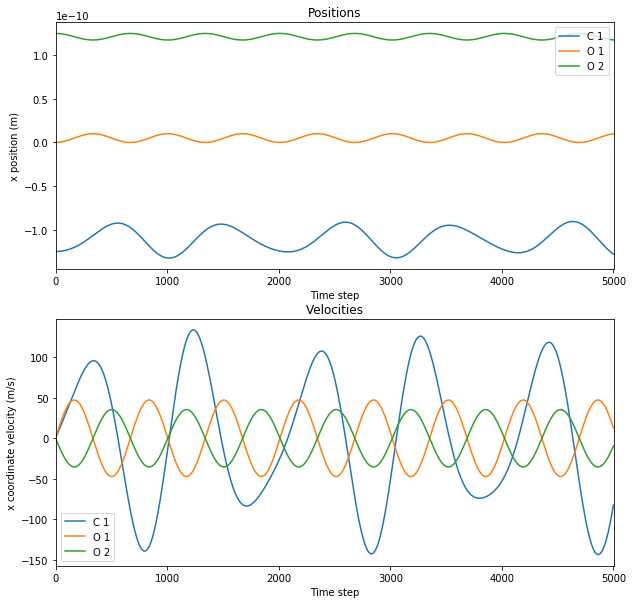

In [98]:
atom_types = [8, 6, 8]
atom_xyz = np.array([[-125e-12, 0., 0.], [0., 0., 0.], [125e-12, 0., 0.]])
atom_velocities = np.array([[0., 0., 0.], [0., 0., 0.], [0, 0., 0.]])
atom_bonds = np.array([
    [[0., 0.], [116.2e-12, -1.], [0., 0.]],
    [[116.2e-12, -1.], [0., 0.], [116.2e-12, -1.]],
    [[0., 0.], [116.2e-12, -1.], [0., 0.]]
])
atom_masses = np.array([2.657e-26, 1.993e-26, 2.657e-26])  # The reduced masses of hydrogen 1 (in H2) in kg

mol_dyn = MolDynMD(atom_types=atom_types,
                          atom_masses=atom_masses,
                          atom_velocities=atom_velocities,
                          atom_positions=atom_xyz,
                          atom_bonds=atom_bonds,
                          dt_s=1e-15,
                          grad_h_m=0.001e-15)

for _ in range(5000):
    mol_dyn.timestep()
    
x_positions_C1 = []
x_velocities_C1 = []

x_positions_O1 = []
x_velocities_O1 = []

x_positions_O2 = []
x_velocities_O2 = []

for step in mol_dyn.trajectory:
    positions = step["atom_positions"]
    velocities = step["atom_velocities"]
    x_positions_C1.append(positions[0, 0])
    x_positions_O1.append(positions[1, 0])
    x_positions_O2.append(positions[2, 0])
    
    x_velocities_C1.append(velocities[0, 0])
    x_velocities_O1.append(velocities[1, 0])
    x_velocities_O2.append(velocities[2, 0])
    
x_positions_C1 = np.array(x_positions_C1)
x_positions_O1 = np.array(x_positions_O1)
x_positions_O2 = np.array(x_positions_O2)
x_velocities_C1 = np.array(x_velocities_C1) 
x_velocities_O1 = np.array(x_velocities_O1)
x_velocities_O2 = np.array(x_velocities_O2)

timesteps = np.arange(len(x_positions_C1))

_, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axs[0].set_xlim(0, len(x_positions_C1))
axs[0].set_title("Positions")
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("x position (m)")
axs[0].plot(timesteps, x_positions_C1, label="C 1")
axs[0].plot(timesteps, x_positions_O1, label="O 1")
axs[0].plot(timesteps, x_positions_O2, label="O 2")
axs[0].legend(loc="best")

axs[1].set_xlim(0, len(x_velocities_C1))
axs[1].set_title("Velocities")
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("x coordinate velocity (m/s)")
axs[1].plot(timesteps, x_velocities_C1, label="C 1")
axs[1].plot(timesteps, x_velocities_O1, label="O 1")
axs[1].plot(timesteps, x_velocities_O2, label="O 2")
axs[1].legend(loc="best")